<h3>Data Collection


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Placement_Data_Full_Class.csv')

In [ ]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [ ]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


<Axes: xlabel='ssc_b', ylabel='count'>

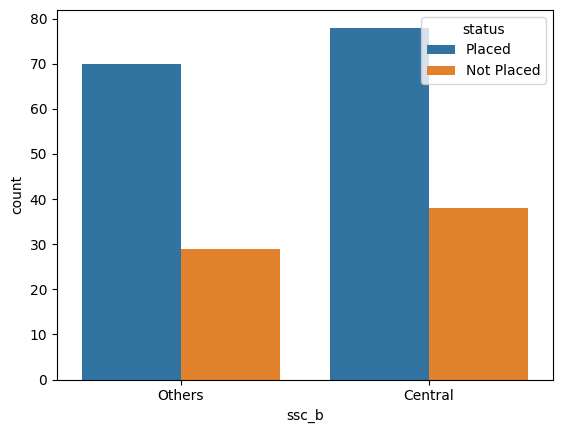

In [ ]:
sns.countplot(x='ssc_b',data=df,hue='status')

<Axes: xlabel='status', ylabel='count'>

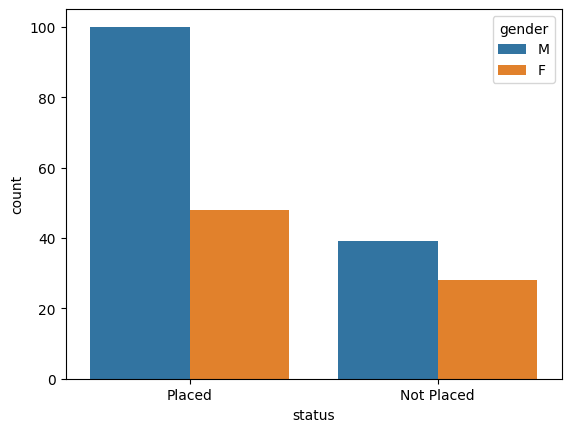

In [ ]:
sns.countplot(x='status',data=df,hue='gender')

<Axes: xlabel='salary', ylabel='Count'>

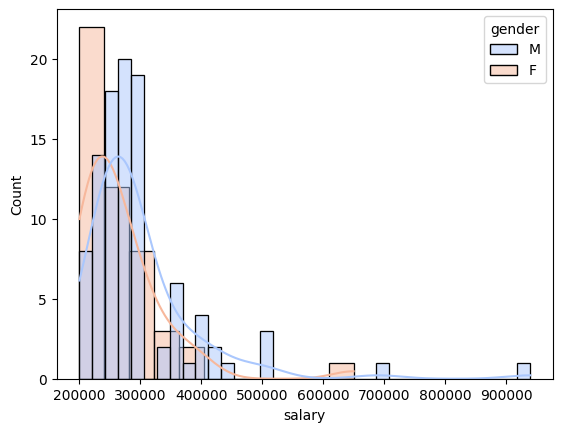

In [ ]:
sns.histplot(x='salary',common_bins=False,kde=True,hue='gender',data=df,palette='coolwarm')

<h3>Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['gender'] = encoder.fit_transform(df['gender'])

In [ ]:
df['workex'] = encoder.fit_transform(df['workex'])

In [ ]:
df['degree_t'] = encoder.fit_transform(df['degree_t'])

In [ ]:
df['hsc_s'] = encoder.fit_transform(df['hsc_s'])

In [ ]:
df['specialisation'] = encoder.fit_transform(df['specialisation'])

In [ ]:
df['ssc_b'] = df['ssc_b'].apply( lambda x : 1 if x == "Central" else 0 )
df['hsc_b'] = df['hsc_b'].apply( lambda x : 1 if x == "Central" else 0 )

In [ ]:
df['status'] = df['status'].apply( lambda x : 1 if x == "Placed" else 0 )

In [ ]:
df['salary']=df['salary'].fillna(0)

In [ ]:
df[['ssc_b','hsc_b','workex','status']]

,ssc_b,hsc_b,workex,status
0,0,0,0,1
1,1,0,1,1
2,1,1,0,1
3,1,1,0,0
4,1,1,0,1
...,...,...,...,...
210,0,0,0,1
211,0,0,0,1
212,0,0,1,1
213,0,0,0,1


In [ ]:
df['hsc_s'] = encoder.fit_transform(df['hsc_s'])

In [ ]:
df['hsc_s']

0      1
1      2
2      0
3      2
4      1
      ..
210    1
211    2
212    1
213    1
214    2
Name: hsc_s, Length: 215, dtype: int64

In [ ]:
df.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

<h3>EDA

In [ ]:
df.corr()['status'].sort_values()

specialisation   -0.250655
ssc_b            -0.037297
sl_no            -0.026859
degree_t         -0.020352
hsc_b            -0.016945
hsc_s             0.033442
mba_p             0.076922
gender            0.090670
etest_p           0.127639
workex            0.276060
degree_p          0.479861
hsc_p             0.491228
ssc_p             0.607889
salary            0.865774
status            1.000000
Name: status, dtype: float64

<Axes: >

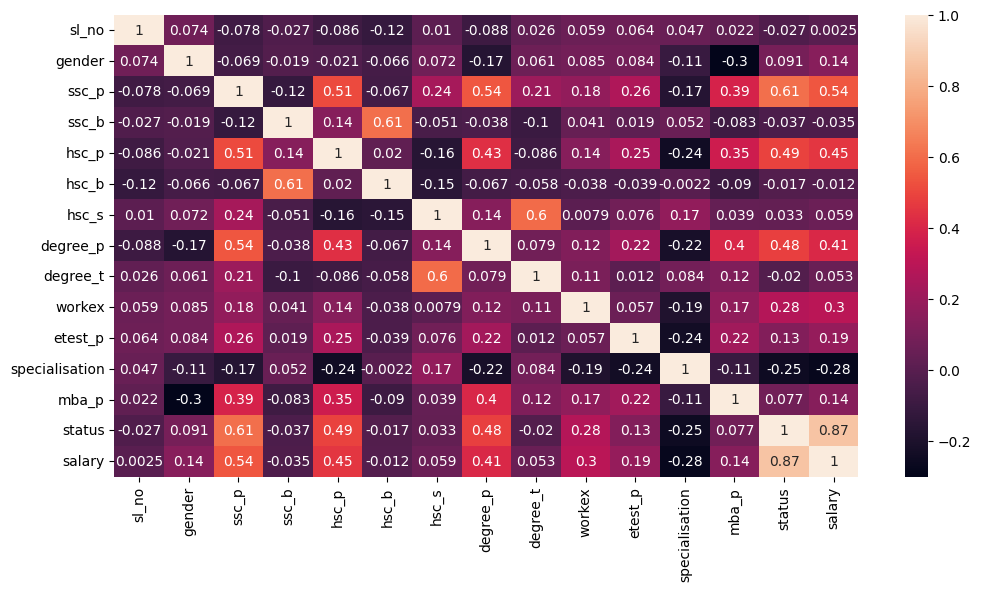

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap( df.corr() , annot=True )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    int64  
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    int64  
 6   hsc_s           215 non-null    int64  
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    int64  
 9   workex          215 non-null    int64  
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    int64  
 12  mba_p           215 non-null    float64
 13  status          215 non-null    int64  
 14  salary          215 non-null    float64
dtypes: float64(6), int64(9)
memory usage: 25.3 KB


<h3>Build Model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['salary','status'],axis=1).values
y = df['status'].values

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop_loss = EarlyStopping(monitor='val_loss',patience=10,verbose=1,mode='min')
early_stop_acc = EarlyStopping(monitor='accuracy',patience=10,verbose=1,mode='max')


In [ ]:
model = Sequential()

model.add(Dense(200,activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(100,activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(50,activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(25,activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=100,callbacks=[early_stop_loss,early_stop_acc])

Epoch 1/100
1/6 [====>.........................] - ETA: 15s - loss: 1.1375

6/6 [==============================] - 3s 47ms/step - loss: 1.1258 - val_loss: 0.6981
Epoch 2/100
1/6 [====>.........................] - ETA: 0s - loss: 0.6525

6/6 [==============================] - 0s 9ms/step - loss: 0.5680 - val_loss: 0.5231
Epoch 3/100
1/6 [====>.........................] - ETA: 0s - loss: 0.5265

6/6 [==============================] - 0s 10ms/step - loss: 0.5304 - val_loss: 0.4876
Epoch 4/100
1/6 [====>.........................] - ETA: 0s - loss: 0.5058

6/6 [==============================] - 0s 9ms/step - loss: 0.5412 - val_loss: 0.6040
Epoch 5/100
1/6 [====>.........................] - ETA: 0s - loss: 0.5495

6/6 [==============================] - 0s 11ms/step - loss: 0.4869 - val_loss: 0.4677
Epoch 6/100
1/6 [====>.........................] - ETA: 0s - loss: 0.5144

6/6 [==============================] - 0s 9ms/step - loss: 0.4669 - val_loss: 0.5637
Epoch 7/100
1/6 [====>.........................] - ETA: 0s - loss: 0.5468

6/6 [==============================] - 0s 11ms/step - loss: 0.5023 - val_loss: 0.4363
Epoch 8/100
1/6 [====>.........................] - ETA: 0s - loss: 0.3706

6/6 [==============================] - 0s 13ms/step - loss: 0.4796 - val_loss: 0.7503
Epoch 9/100
1/6 [====>.........................] - ETA: 0s - loss: 0.5623

6/6 [==============================] - 0s 10ms/step - loss: 0.5814 - val_loss: 0.7014
Epoch 10/100
1/6 [====>.........................] - ETA: 0s - loss: 0.6447

6/6 [==============================] - 0s 10ms/step - loss: 0.5221 - val_loss: 0.5000
Epoch 11/100
1/6 [====>.........................] - ETA: 0s - loss: 0.5058

6/6 [==============================] - 0s 10ms/step - loss: 0.4293 - val_loss: 0.4551
Epoch 12/100
1/6 [====>.........................] - ETA: 0s - loss: 0.3450

6/6 [==============================] - 0s 9ms/step - loss: 0.3644 - val_loss: 0.4917
Epoch 13/100
1/6 [====>.........................] - ETA: 0s - loss: 0.4390

6/6 [==============================] - 0s 14ms/step - loss: 0.3745 - val_loss: 0.4324
Epoch 14/100
1/6 [====>.........................] - ETA: 0s - loss: 0.3485

6/6 [==============================] - 0s 9ms/step - loss: 0.3557 - val_loss: 0.4344
Epoch 15/100
1/6 [====>.........................] - ETA: 0s - loss: 0.2864

6/6 [==============================] - 0s 10ms/step - loss: 0.3492 - val_loss: 0.5175
Epoch 16/100
1/6 [====>.........................] - ETA: 0s - loss: 0.3016

6/6 [==============================] - 0s 10ms/step - loss: 0.3649 - val_loss: 0.4238
Epoch 17/100
1/6 [====>.........................] - ETA: 0s - loss: 0.3158

6/6 [==============================] - 0s 12ms/step - loss: 0.3428 - val_loss: 0.4766
Epoch 18/100
1/6 [====>.........................] - ETA: 0s - loss: 0.5715

6/6 [==============================] - 0s 13ms/step - loss: 0.3644 - val_loss: 0.4753
Epoch 19/100
1/6 [====>.........................] - ETA: 0s - loss: 0.3372

6/6 [==============================] - 0s 10ms/step - loss: 0.3121 - val_loss: 0.5191
Epoch 20/100
1/6 [====>.........................] - ETA: 0s - loss: 0.3910

6/6 [==============================] - 0s 13ms/step - loss: 0.3746 - val_loss: 0.4618
Epoch 21/100
1/6 [====>.........................] - ETA: 0s - loss: 0.3264

6/6 [==============================] - 0s 13ms/step - loss: 0.2981 - val_loss: 0.4378
Epoch 22/100
1/6 [====>.........................] - ETA: 0s - loss: 0.3233

6/6 [==============================] - 0s 10ms/step - loss: 0.3024 - val_loss: 0.4253
Epoch 23/100
1/6 [====>.........................] - ETA: 0s - loss: 0.2832

6/6 [==============================] - 0s 9ms/step - loss: 0.3039 - val_loss: 0.4512
Epoch 24/100
1/6 [====>.........................] - ETA: 0s - loss: 0.2391

6/6 [==============================] - 0s 12ms/step - loss: 0.3093 - val_loss: 0.4346
Epoch 25/100
1/6 [====>.........................] - ETA: 0s - loss: 0.3106

6/6 [==============================] - 0s 9ms/step - loss: 0.3040 - val_loss: 0.4982
Epoch 26/100
1/6 [====>.........................] - ETA: 0s - loss: 0.3746

6/6 [==============================] - 0s 10ms/step - loss: 0.3252 - val_loss: 0.4650
Epoch 26: early stopping


In [ ]:
losses = pd.DataFrame(model.history.history)

<Axes: >

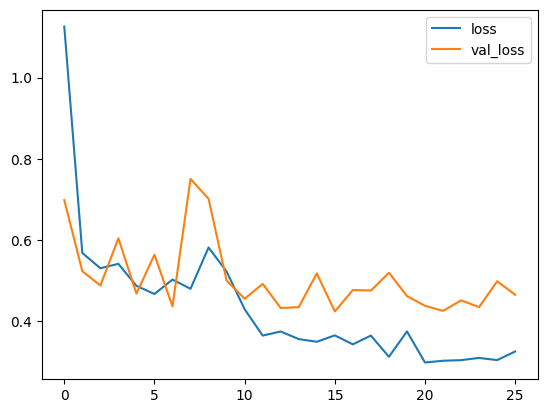

In [ ]:
losses.plot()

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

2/2 [==============================] - 0s 7ms/step


In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 4,  8],
       [ 1, 30]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.33      0.47        12
           1       0.79      0.97      0.87        31

    accuracy                           0.79        43
   macro avg       0.79      0.65      0.67        43
weighted avg       0.79      0.79      0.76        43



In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('placement.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<h3>Predict Salary

In [ ]:
X = df.drop(['salary'],axis=1).values
y = df['salary'].values

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = Sequential()

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(loss='mse',optimizer='adam')

In [ ]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=215,callbacks=[early_stop_acc,early_stop_loss])

In [ ]:
losses = pd.DataFrame(model.history.history)

<Axes: >

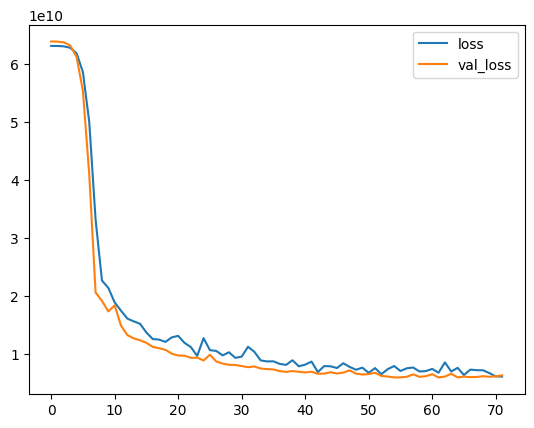

In [ ]:
losses.plot()

In [ ]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , accuracy_score

In [ ]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 7ms/step


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)*100

71.4909278284313

In [ ]:
mean_absolute_error(y_test,y_pred)

42717.440991778705

In [ ]:
mean_squared_error(y_test,y_pred)

6287320776.0754385

In [ ]:
y_pred = y_pred.reshape(-1)

In [ ]:
y_test.shape

(43,)

In [ ]:
y_pred.shape

(43,)

In [ ]:
mean_squared_error(y_test,y_pred)

20214402817.779404

In [ ]:
df.describe()['salary']

count       215.000000
mean     198702.325581
std      154780.926716
min           0.000000
25%           0.000000
50%      240000.000000
75%      282500.000000
max      940000.000000
Name: salary, dtype: float64